### Create two separate customer segmentations (using clustering) to split them into 3-5 clusters
#### based on demographics (only on the information from twm_customer)

In [1]:
#import all libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances

In [2]:
customer=pd.read_csv('twm_customer.csv')
customer.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY


# Demographics Segmentation

In [3]:
customer['city_name'].unique().shape

(69,)

In [4]:
cus=customer.copy()

In [5]:
pd.get_dummies(cus,columns=['city_name'])

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,...,city_name_Seattle,city_name_St Louis,city_name_St Paul,city_name_Tampa,city_name_Toledo,city_name_Tucson,city_name_Tulsa,city_name_Virginia Beach,city_name_Washington,city_name_Wichita
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,...,0,0,0,0,0,0,0,0,0,0
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,...,0,0,0,0,0,0,0,0,0,0
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,...,0,0,0,0,0,0,0,0,0,0
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,...,0,0,0,0,0,0,0,0,0,0
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,...,0,0,0,0,0,0,0,0,0,0
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,...,0,0,0,0,0,0,0,0,0,0
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,...,0,0,0,0,0,0,0,0,0,0
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,...,0,0,0,0,0,0,0,0,0,0


In [6]:
customer['state_code'].unique().shape

(33,)

In [7]:
#drop the columns not used for segmentation
dc=customer.drop(['name_prefix','first_name','last_name','street_nbr','street_name','postal_code','state_code','city_name'],axis=1)

In [8]:
dc.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status
0,1362691,26150,46,5,1,M,2
1,1362487,6605,71,1,0,M,2
2,1363160,18548,38,8,0,F,1
3,1362752,47668,54,3,0,F,1
4,1362548,44554,59,9,2,F,4


In [9]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cust_id          747 non-null    int64 
 1   income           747 non-null    int64 
 2   age              747 non-null    int64 
 3   years_with_bank  747 non-null    int64 
 4   nbr_children     747 non-null    int64 
 5   gender           747 non-null    object
 6   marital_status   747 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 41.0+ KB


In [10]:
dc['gender']=pd.get_dummies(dc['gender'],prefix='gender')


In [11]:
dc.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status
0,1362691,26150,46,5,1,0,2
1,1362487,6605,71,1,0,0,2
2,1363160,18548,38,8,0,1,1
3,1362752,47668,54,3,0,1,1
4,1362548,44554,59,9,2,1,4


In [12]:
dc['marital_status'].value_counts()

2    353
1    276
4     70
3     48
Name: marital_status, dtype: int64

In [13]:
dc.describe()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status
count,7.470000e+02,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,1.362991e+06,22728.281124,42.479250,3.907631,0.714859,0.559572,1.882195
std,2.925255e+02,22207.221405,19.114879,2.675634,1.103410,0.496771,0.892051
min,1.362480e+06,0.000000,13.000000,0.000000,0.000000,0.000000,1.000000
25%,1.362732e+06,7118.500000,28.000000,2.000000,0.000000,0.000000,1.000000
50%,1.362993e+06,17242.000000,42.000000,4.000000,0.000000,1.000000,2.000000
75%,1.363244e+06,31338.000000,56.000000,6.000000,1.000000,1.000000,2.000000
max,1.363495e+06,144157.000000,89.000000,9.000000,5.000000,1.000000,4.000000


In [14]:
# data cleaning
dc.dtypes

cust_id            int64
income             int64
age                int64
years_with_bank    int64
nbr_children       int64
gender             uint8
marital_status     int64
dtype: object

In [15]:
#check duplicate-no duplicated id
id_unique=len(set(dc.cust_id))
dup=len(dc)-id_unique
print(dup)

0


In [16]:
#check null-no null number 
dc.isnull().sum().sort_values()

cust_id            0
income             0
age                0
years_with_bank    0
nbr_children       0
gender             0
marital_status     0
dtype: int64

In [17]:
#drop id columns
dc=dc.drop('cust_id',axis=1)

In [18]:
#find all the categorical data
cus_category=dc.dtypes[dc.dtypes=='object'].index.tolist()
cus_numerical=dc.dtypes[dc.dtypes!='object'].index.tolist()

In [19]:
dc.columns

Index(['income', 'age', 'years_with_bank', 'nbr_children', 'gender',
       'marital_status'],
      dtype='object')

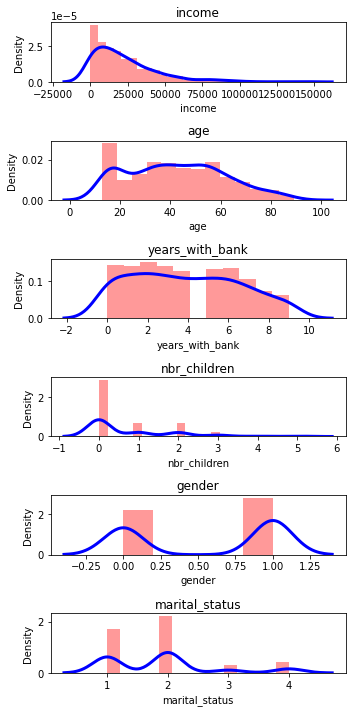

In [52]:
# visualize each columns sns.distplot  #The seaborn.kdeplot () function is used to plot the data against a single/univariate variable. It represents the probability distribution of the data values as the area under the plotted curve.
plt.figure(figsize=(5,10))
for i in range (len(dc.columns)):
    plt.subplot(6,1,i+1)
    sns.distplot(dc[dc.columns[i]],kde_kws={'color':'b','lw':3,'label':'KDE'},hist_kws={'color':'r'})
    plt.title(dc.columns[i])
plt.tight_layout()


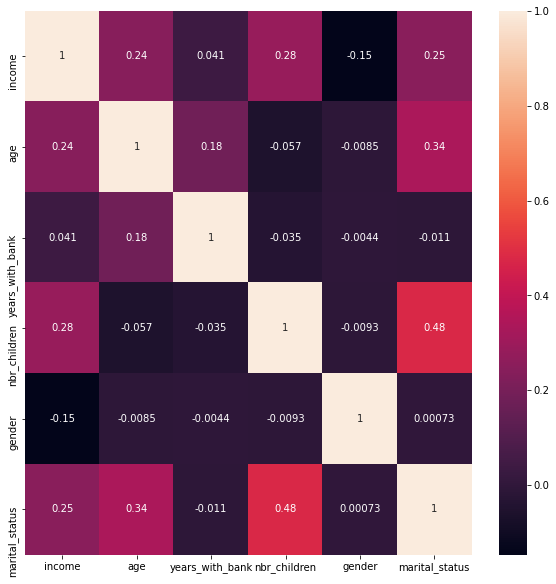

In [20]:
#plot correlations heatmp -not strong correlation. only marital status wiht no of childre has correlation
correlations=dc.corr()
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(correlations,annot=True)

In [21]:
#scale the data
scaler=StandardScaler()
dc_scale=scaler.fit_transform(dc)

In [22]:
# create the elbow-arm plot
score=[]
cluster_range=range(1,11)
for i in cluster_range:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(dc_scale)
    score.append(kmeans.inertia_)

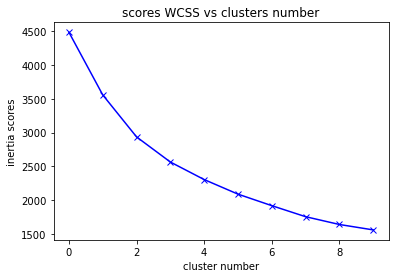

In [23]:
plt.plot(score,'bx-' )
plt.title('scores WCSS vs clusters number')
plt.xlabel('cluster number')
plt.ylabel('inertia scores')
plt.show()

In [24]:
#Apply K-Means -clusters pick 3 or 4)
kmeans_3=KMeans(n_clusters=3)
kmeans_3.fit(dc_scale)
labels=kmeans_3.labels_
kmeans_3.cluster_centers_  #find the centroid point for 3 clusters

array([[ 0.1413577 ,  0.91028303,  0.25621731, -0.45010373, -0.01994758,
         0.05414541],
       [ 0.54120872, -0.13693984, -0.14789032,  1.34685721,  0.01265421,
         0.88728701],
       [-0.64015756, -1.02847004, -0.19608381, -0.58406001,  0.01429189,
        -0.82602396]])

In [341]:
labels.shape

(747,)

In [26]:
#concatenate the clusters lables to the original dataframe
customer_clusters=pd.concat([customer, pd.DataFrame({'Cluster No':labels})],axis=1)
customer_clusters.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code,Cluster No
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV,0
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA,0
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA,2
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA,0
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY,1


In [27]:
dc_clusters=pd.concat([dc, pd.DataFrame({'Cluster No':labels})],axis=1)
dc_clusters.head()

,income,age,years_with_bank,nbr_children,gender,marital_status,Cluster No
0,26150,46,5,1,0,2,0
1,6605,71,1,0,0,2,0
2,18548,38,8,0,1,1,2
3,47668,54,3,0,1,1,0
4,44554,59,9,2,1,4,1


In [28]:
#filter out each cluster 
c0=dc_clusters[dc_clusters['Cluster No']==0]
c6=dc_clusters[dc_clusters['Cluster No']==1]
c2=dc_clusters[dc_clusters['Cluster No']==2]


In [359]:
c5=dc_clusters['Cluster No']

In [360]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
dc3=dc_clusters.drop('Cluster No',axis=1)
ds=scaler.fit_transform(dc3)
ds1=pd.DataFrame(ds,columns=['income', 'age', 'years_with_bank', 'nbr_children', 'gender',
       'marital_status'])

In [361]:
ds4=pd.concat((ds1,c5),axis=1)
ds4.head()

,income,age,years_with_bank,nbr_children,gender,marital_status,Cluster No
0,0.181399,0.434211,0.555556,0.2,0.0,0.333333,2
1,0.045818,0.763158,0.111111,0.0,0.0,0.333333,2
2,0.128665,0.328947,0.888889,0.0,1.0,0.000000,1
3,0.330667,0.539474,0.333333,0.0,1.0,0.000000,2
4,0.309066,0.605263,1.000000,0.4,1.0,1.000000,0


In [362]:
ds4.groupby('Cluster No').agg({'income':['mean'], 'age':['mean'], 'years_with_bank':['mean'], 'nbr_children':['mean'], 'gender':['mean'],
       'marital_status':['mean']}).reset_index()

,Cluster No,income,age,years_with_bank,nbr_children,gender,marital_status
,,mean,mean,mean,mean,mean,mean
0,0,0.240492,0.356971,0.397970,0.438462,0.557692,0.557692
1,1,0.058193,0.124275,0.376177,0.014407,0.559322,0.048023
2,2,0.178279,0.614426,0.504217,0.040264,0.561056,0.304730


In [363]:
#create a radar chart for 3 clusters

import plotly.graph_objects as go
categories = ['income', 'age', 'years_with_bank', 'nbr_children', 'gender',
       'marital_status', 'Cluster No']


fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[0.240492,	0.356971,	0.397970,	0.438462,	0.557692,	0.557692],
      theta=categories,
      fill='toself',
      name='Cluster 1'
))
fig.add_trace(go.Scatterpolar(
      r=[0.058193,	0.124275,	0.376177,	0.014407,	0.559322,	0.048023],
      theta=categories,
      fill='toself',
      name='Cluster 2'
))

fig.add_trace(go.Scatterpolar(
      r=[0.178279,	0.614426,	0.504217,	0.040264,	0.561056,	0.304730],
      theta=categories,
      fill='toself',
      name='Cluster 3'
))


fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 0.6]
    )),
  showlegend=True
)

fig.show()

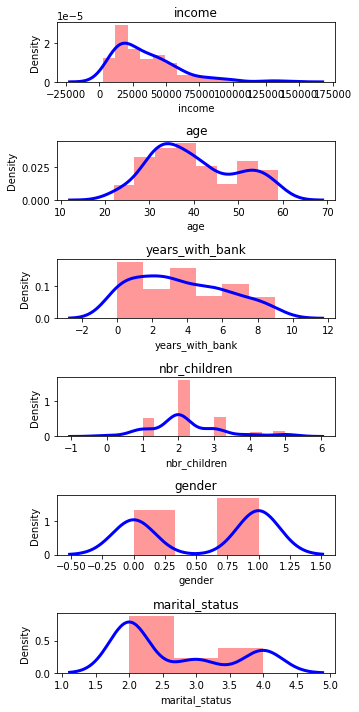

In [357]:
plt.figure(figsize=(5,10))  #for cluster 0: income about 20000$, age 30-40, average 2 years with bank, 2 children,married status=2
for i in range (len(c0.columns)-1):
    plt.subplot(6,1,i+1)
    sns.distplot(c0[c0.columns[i]],kde_kws={'color':'b','lw':3,'label':'KDE'},hist_kws={'color':'r'})
    plt.title(c0.columns[i])
plt.tight_layout()

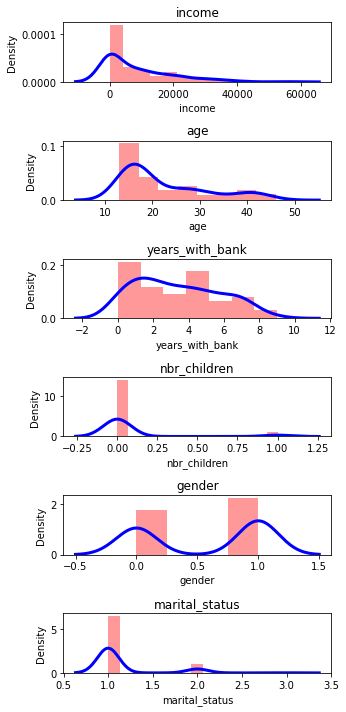

In [366]:
plt.figure(figsize=(5,10))  #for cluster 1: <20 years old, no income, no children, single,average 2 years with bank
for i in range (len(c6.columns)-1):
    plt.subplot(6,1,i+1)
    sns.distplot(c6[c6.columns[i]],kde_kws={'color':'b','lw':3,'label':'KDE'},hist_kws={'color':'r'})
    plt.title(c6.columns[i])
plt.tight_layout()

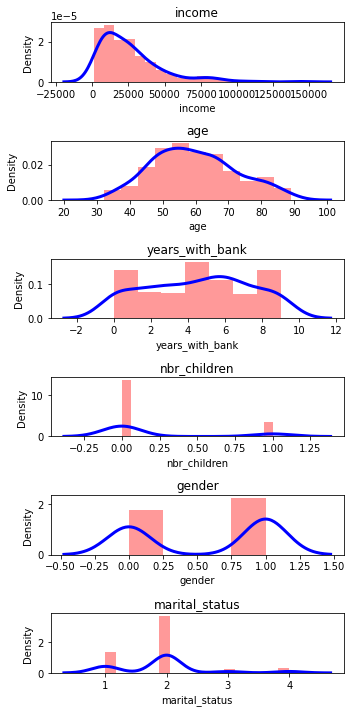

In [367]:
plt.figure(figsize=(5,10))  #for cluster 2: average 25000$,senior, average 5 years with bank,no children,male
for i in range (len(c2.columns)-1):
    plt.subplot(6,1,i+1)
    sns.distplot(c2[c2.columns[i]],kde_kws={'color':'b','lw':3,'label':'KDE'},hist_kws={'color':'r'})
    plt.title(c2.columns[i])
plt.tight_layout()

# Segmentation based on banking activity 

In [368]:
accounts=pd.read_csv('twm_accounts.csv', sep=';')
accounts.head(1)

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58


In [69]:
tran=pd.read_csv('twm_transactions.csv',sep=';')
tran.head(1)

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,27,13625623,0.0,0.0,0.0,3753.34,21.10.1995,121656,A,IQ


In [70]:
checking_acct=pd.read_csv('twm_checking_acct.csv',sep=';')
checking_acct.head(1)

,cust_id,acct_nbr,minimum_balance,per_check_fee,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1362548,13625482,3000,0.0,Y,11.11.1986,NaN,6004.34,569.65


In [71]:
checking_tran=pd.read_csv('twm_checking_tran.csv',sep=';')
checking_tran.head(1)

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363481,26,-0.15,-0.15,0.0,58.99,29.1.1995,,,FK


In [72]:
credit_acct=pd.read_csv('twm_credit_acct.csv',sep=';')
credit_acct.head(1)

,cust_id,acct_nbr,credit_limit,credit_rating,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,4561143213631600,1000,0,Y,12.10.1988,NaN,657.46,286.69


In [73]:
credit_tran=pd.read_csv('twm_credit_tran.csv',sep=';')
credit_tran.head(1)

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363088,46,-121.49,-121.49,0.0,-141.0,20.10.1995,101144,E,CG


In [104]:
saving_acct=pd.read_csv('twm_savings_acct.csv',sep=';')
saving_tran=pd.read_csv('twm_savings_tran.csv',sep=';')

In [105]:
#change the negative transaction to absolute value
saving_tran['tran_amt']=saving_tran['tran_amt'].abs()
checking_tran['tran_amt']=checking_tran['tran_amt'].abs()
credit_tran['tran_amt']=credit_tran['tran_amt'].abs()

In [106]:
#creating bins for transaction mount
bins=[-10,0,100,500,1000,100000]
bin_labels=[0,1,2,3,4]
saving_tran['save_bin']=pd.cut(saving_tran['tran_amt'],bins,labels=bin_labels)
checking_tran['check_bin']=pd.cut(checking_tran['tran_amt'],bins,labels=bin_labels)
credit_tran['credit_bin']=pd.cut(credit_tran['tran_amt'],bins,labels=bin_labels)


In [157]:
#extract the meaning data including most common transaction amount as bin, total transaction count, and total transaction sum (absolute)
ds=saving_tran.groupby('cust_id').apply(lambda x: x['save_bin'].value_counts().idxmax()).to_frame(name='save_mode')
dc=checking_tran.groupby('cust_id').apply(lambda x: x['check_bin'].value_counts().idxmax()).to_frame(name='check_mode')
d_credit=credit_tran.groupby('cust_id').apply(lambda x: x['credit_bin'].value_counts().idxmax()).to_frame(name='credit_mode')
ds1=saving_tran.groupby('cust_id')['tran_amt'].agg(['sum','count'])
dc1=checking_tran.groupby('cust_id')['tran_amt'].agg(['sum','count'])
d_credit1=credit_tran.groupby('cust_id')['tran_amt'].agg(['sum','count'])

#merge the data 
save=ds.merge(ds1,on='cust_id')
check=dc.merge(dc1,on='cust_id')
credit=d_credit.merge(d_credit1,on='cust_id')

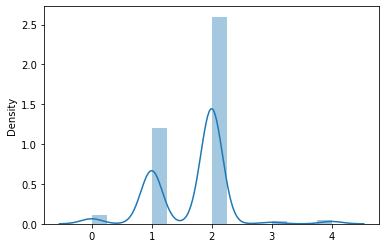

In [132]:
sns.distplot(d_credit)

In [158]:
# merge each account info with the extracted transaction data 
dcredit=pd.merge(credit_acct,credit,on='cust_id',how='outer')
dcheck=pd.merge(checking_acct,check,on='cust_id',how='outer')
dsave=pd.merge(saving_acct,save,on='cust_id',how='outer')

In [159]:
dcredit.head()
dcredit.rename(columns={'sum':'credit_sum','count':'credit_tran_count'},inplace=True)
dcredit

,cust_id,acct_nbr,credit_limit,credit_rating,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,credit_mode,credit_sum,credit_tran_count
0,1363160,4561143213631600,1000,0,Y,12.10.1988,NaN,657.46,286.69,2.0,12506.95,68.0
1,1362487,4561143213624870,3000,0,Y,8.8.1995,NaN,0.00,1548.23,2.0,4773.21,32.0
2,1362548,4561143213625480,6700,0,Y,11.11.1986,NaN,6965.25,68.68,2.0,15089.99,22.0
3,1362752,4561143213627520,2400,0,N,9.10.1994,2.4.1995,2302.14,0.00,2.0,6182.65,15.0
4,1363017,4561143213630170,1000,0,Y,8.2.1995,NaN,0.00,1000.00,1.0,10172.72,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...
463,1363364,4561143213633640,3000,0,N,23.11.1989,23.7.1995,1783.86,1785.97,2.0,15457.27,75.0
464,1363467,4561143213634670,1500,0,Y,30.6.1993,NaN,1193.89,1500.00,2.0,16725.60,74.0
465,1363263,4561143213632630,3000,0,Y,29.3.1995,NaN,0.00,1218.94,1.0,13296.94,76.0
466,1362569,4561143213625690,9200,0,Y,6.12.1995,NaN,0.00,9200.00,2.0,9200.00,28.0


In [166]:
dsave.head()

,cust_id,saving_account_status,saving_balance,save_mode,save_sum,save_tran_count
0,1363160,Y,122.54,1.0,2662.22,48.0
1,1362487,N,12.89,1.0,887.52,19.0
2,1362548,Y,254.02,1.0,3.78,12.0
3,1362752,Y,609.33,1.0,9.07,12.0
4,1363017,N,2901.35,1.0,1840.05,24.0


In [167]:
dcheck.head()

,cust_id,account_active,ending_balance,check_mode,sum,count
0,1362548,Y,569.65,2,16817.43,99
1,1362487,Y,1401.21,1,3244.83,52
2,1363017,Y,147.15,2,10057.28,99
3,1362752,Y,3.76,1,12086.71,93
4,1363282,Y,84.18,1,7720.58,91


In [171]:
dcheck.rename(columns={'account_active':'check_account_status','ending_balance':'check_balance','sum':'check_sum','count':'check_tran_count'},inplace=True)

In [168]:
#dsave=dsave[['cust_id','account_active','ending_balance','save_mode','sum','count']]

In [170]:
#dsave=dsave[['cust_id','account_active','ending_balance','save_mode','sum','count']]
#dsave.rename(columns={'account_active':'saving_account_status','ending_balance':'saving_balance', 'sum':'save_sum','count':'save_tran_count'},inplace=True)

In [172]:
dcredit.head()

,cust_id,acct_nbr,credit_limit,credit_rating,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,credit_mode,credit_sum,credit_tran_count
0,1363160,4561143213631600,1000,0,Y,12.10.1988,NaN,657.46,286.69,2.0,12506.95,68.0
1,1362487,4561143213624870,3000,0,Y,8.8.1995,NaN,0.00,1548.23,2.0,4773.21,32.0
2,1362548,4561143213625480,6700,0,Y,11.11.1986,NaN,6965.25,68.68,2.0,15089.99,22.0
3,1362752,4561143213627520,2400,0,N,9.10.1994,2.4.1995,2302.14,0.00,2.0,6182.65,15.0
4,1363017,4561143213630170,1000,0,Y,8.2.1995,NaN,0.00,1000.00,1.0,10172.72,63.0


In [173]:
#credit account
dcredit=dcredit[['cust_id','credit_limit','credit_rating','account_active','ending_balance','credit_mode','credit_sum','credit_tran_count']]
d_credit.rename(columns={'account_active':'credit_account_status','ending_balance':'credit_balance'},inplace=True)


In [174]:
#combine the 3 accounts for customers df_cus
df=pd.merge(dcredit, dcheck,on='cust_id',how='outer').merge(dsave,on='cust_id',how='outer')

In [175]:
df.shape #final data frame total 18 columns

(665, 18)

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 665 entries, 0 to 664
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cust_id                665 non-null    int64  
 1   credit_limit           468 non-null    float64
 2   credit_rating          468 non-null    float64
 3   account_active         468 non-null    object 
 4   ending_balance         468 non-null    float64
 5   credit_mode            457 non-null    float64
 6   credit_sum             457 non-null    float64
 7   credit_tran_count      457 non-null    float64
 8   check_account_status   520 non-null    object 
 9   check_balance          520 non-null    float64
 10  check_mode             520 non-null    float64
 11  check_sum              520 non-null    float64
 12  check_tran_count       520 non-null    float64
 13  saving_account_status  421 non-null    object 
 14  saving_balance         421 non-null    float64
 15  save_m

In [177]:
# replace all null values for account status as "N", for numeric data as "0"
cat=df.columns[df.dtypes=='object']
df[cat]=df[cat].fillna('N')
num=df.columns[df.dtypes!='object']
df[num]=df[num].fillna(0)

In [212]:
df.columns

Index(['cust_id', 'credit_limit', 'credit_rating', 'ending_balance',
       'credit_mode', 'credit_sum', 'credit_tran_count', 'check_balance',
       'check_mode', 'check_sum', 'check_tran_count', 'saving_balance',
       'save_mode', 'save_sum', 'save_tran_count', 'account_active_N',
       'account_active_N ', 'account_active_Y ', 'check_account_status_N',
       'check_account_status_N ', 'check_account_status_Y ',
       'saving_account_status_N', 'saving_account_status_N ',
       'saving_account_status_Y '],
      dtype='object')

In [178]:
df.isnull().sum()

cust_id                  0
credit_limit             0
credit_rating            0
account_active           0
ending_balance           0
credit_mode              0
credit_sum               0
credit_tran_count        0
check_account_status     0
check_balance            0
check_mode               0
check_sum                0
check_tran_count         0
saving_account_status    0
saving_balance           0
save_mode                0
save_sum                 0
save_tran_count          0
dtype: int64

In [179]:
#save merged bank behavior data as banking data
df.to_csv('banking_data.csv')

In [180]:
df.dtypes

cust_id                    int64
credit_limit             float64
credit_rating            float64
account_active            object
ending_balance           float64
credit_mode              float64
credit_sum               float64
credit_tran_count        float64
check_account_status      object
check_balance            float64
check_mode               float64
check_sum                float64
check_tran_count         float64
saving_account_status     object
saving_balance           float64
save_mode                float64
save_sum                 float64
save_tran_count          float64
dtype: object

In [181]:
#apply get_dummies to convert the category data to numeric data
df=pd.get_dummies(data=df,columns=cat)

In [182]:
#drop the cust_id column
df1=df.drop('cust_id',axis=1)
df1.head()

,credit_limit,credit_rating,ending_balance,credit_mode,credit_sum,credit_tran_count,check_balance,check_mode,check_sum,check_tran_count,...,save_tran_count,account_active_N,account_active_N,account_active_Y,check_account_status_N,check_account_status_N,check_account_status_Y,saving_account_status_N,saving_account_status_N,saving_account_status_Y
0,1000.0,0.0,286.69,2.0,12506.95,68.0,0.00,0.0,0.00,0.0,...,48.0,0,0,1,1,0,0,0,0,1
1,3000.0,0.0,1548.23,2.0,4773.21,32.0,1401.21,1.0,3244.83,52.0,...,19.0,0,0,1,0,0,1,0,1,0
2,6700.0,0.0,68.68,2.0,15089.99,22.0,569.65,2.0,16817.43,99.0,...,12.0,0,0,1,0,0,1,0,0,1
3,2400.0,0.0,0.00,2.0,6182.65,15.0,3.76,1.0,12086.71,93.0,...,12.0,0,1,0,0,0,1,0,0,1
4,1000.0,0.0,1000.00,1.0,10172.72,63.0,147.15,2.0,10057.28,99.0,...,24.0,0,0,1,0,0,1,0,1,0


In [328]:
dfc=df1.corr()
dfc['credit_limit']

credit_limit                1.000000
credit_rating               0.107858
ending_balance              0.567167
credit_mode                 0.566587
credit_sum                  0.671151
credit_tran_count           0.439128
check_balance               0.231936
check_mode                  0.157469
check_sum                   0.359477
check_tran_count            0.083541
saving_balance              0.173949
save_mode                   0.012616
save_sum                    0.149421
save_tran_count             0.002108
account_active_N           -0.532385
account_active_N            0.221601
account_active_Y            0.389557
check_account_status_N     -0.085930
check_account_status_N     -0.028840
check_account_status_Y      0.094667
saving_account_status_N    -0.004462
saving_account_status_N    -0.043093
saving_account_status_Y     0.026387
Name: credit_limit, dtype: float64

In [183]:
#applying the scaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df1)
df_scaled


array([[-0.38018632, -0.18139298, -0.43293198, ..., -0.76129656,
        -0.27260486,  0.87939373],
       [ 0.50057975, -0.18139298,  0.5651977 , ..., -0.76129656,
         3.6683132 , -1.13714707],
       [ 2.12999699, -0.18139298, -0.60542136, ..., -0.76129656,
        -0.27260486,  0.87939373],
       ...,
       [-0.82056935, -0.18139298, -0.65976093, ..., -0.76129656,
        -0.27260486,  0.87939373],
       [-0.82056935, -0.18139298, -0.65976093, ..., -0.76129656,
        -0.27260486,  0.87939373],
       [-0.82056935, -0.18139298, -0.65976093, ..., -0.76129656,
        -0.27260486,  0.87939373]])

In [ ]:
##  Using final 23 variables data for modeling

In [188]:
df_scaled.shape

(665, 23)

In [189]:
## Conducting Dimensionality reduction 
pca=PCA()
pca.fit(df_scaled)

PCA()

In [190]:
pca.explained_variance_ratio_

array([2.22788402e-01, 1.85906652e-01, 1.42674462e-01, 7.27271503e-02,
       5.74304553e-02, 5.23698228e-02, 4.77089847e-02, 4.24869311e-02,
       3.93390858e-02, 3.09013729e-02, 2.81972792e-02, 1.91611447e-02,
       1.62785542e-02, 1.23119512e-02, 8.78345414e-03, 8.15617997e-03,
       5.03335772e-03, 2.92323367e-03, 2.78942400e-03, 2.03210142e-03,
       2.62124132e-32, 1.87123936e-32, 4.74452854e-33])

Text(0, 0.5, 'cum explained variance')

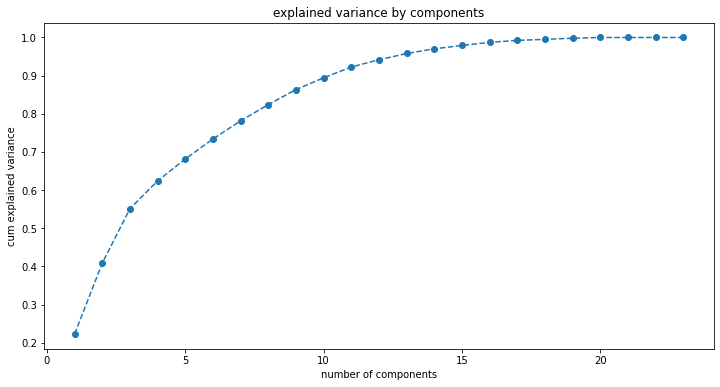

In [191]:
#n_componenet=7, get 80% of cum variance, n-components=10, get 90% of total variance
plt.figure(figsize=(12,6))
plt.plot(range(1,24),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--')
plt.title('explained variance by components')
plt.xlabel('number of components')
plt.ylabel('cum explained variance')


In [372]:
# Apply PCA n_components=6 
pca5=PCA(n_components=5)
components5=pca5.fit_transform(df_scaled)
components5.shape

(665, 5)

In [373]:
print(pca5.components_)

[[ 2.88474405e-01  1.87207570e-03  2.37163434e-01  3.14262806e-01
   3.13045084e-01  3.04959343e-01  1.53220311e-01  2.72486578e-01
   2.70819953e-01  2.71616737e-01  2.66892747e-02 -8.02781404e-02
   2.55147398e-02 -5.78894659e-02 -3.14342309e-01  5.12853430e-02
   2.71544806e-01 -2.65031163e-01  9.39961663e-03  2.34150163e-01
   8.85131494e-02 -1.07183943e-02 -8.05413506e-02]
 [ 1.21982165e-01  3.84153907e-02  8.32422276e-02  1.09020577e-01
   1.06435500e-01  9.94780658e-02  2.26057685e-02 -8.79890695e-02
  -1.96701867e-02 -9.83434783e-02  2.67513325e-01  4.20485961e-01
   3.46617573e-01  4.26872423e-01 -1.06099825e-01  1.24086986e-02
   9.42133646e-02  1.09803922e-01 -3.41782393e-02 -7.92028594e-02
  -4.23098314e-01  3.54487661e-02  3.93070120e-01]
 [ 1.55501640e-01  7.46709319e-02  1.83442434e-01  2.20887454e-01
   1.60041397e-01  2.30824372e-01 -1.39591249e-01 -3.53240717e-01
  -2.75698901e-01 -3.41534123e-01 -1.30650328e-01 -1.38260866e-01
  -1.49015718e-01 -1.19138301e-01 -2.608

In [374]:
df.columns

Index(['cust_id', 'credit_limit', 'credit_rating', 'ending_balance',
       'credit_mode', 'credit_sum', 'credit_tran_count', 'check_balance',
       'check_mode', 'check_sum', 'check_tran_count', 'saving_balance',
       'save_mode', 'save_sum', 'save_tran_count', 'account_active_N',
       'account_active_N ', 'account_active_Y ', 'check_account_status_N',
       'check_account_status_N ', 'check_account_status_Y ',
       'saving_account_status_N', 'saving_account_status_N ',
       'saving_account_status_Y '],
      dtype='object')

In [375]:
features=df.columns.values
features

array(['cust_id', 'credit_limit', 'credit_rating', 'ending_balance',
       'credit_mode', 'credit_sum', 'credit_tran_count', 'check_balance',
       'check_mode', 'check_sum', 'check_tran_count', 'saving_balance',
       'save_mode', 'save_sum', 'save_tran_count', 'account_active_N',
       'account_active_N ', 'account_active_Y ', 'check_account_status_N',
       'check_account_status_N ', 'check_account_status_Y ',
       'saving_account_status_N', 'saving_account_status_N ',
       'saving_account_status_Y '], dtype=object)

In [213]:
#print the PCA numbers 1-7 with the corresponding variables
# selected_columns=[]
# for i in range(7):
#     selected_columns.append('pc-'+str(i))
# print(pd.DataFrame(pca7.components_,columns=df_scaled.columns, index=selected_columns))
# components7=pd.DataFrame(components7,columns=selected_columns)

In [376]:
# test K_means Clustering numbers
wcss=[]
for i in range(1,10):
    kpca5=KMeans(n_clusters=i,init='k-means++',random_state=1)
    kpca5.fit(components5)
    wcss.append(kpca5.inertia_)

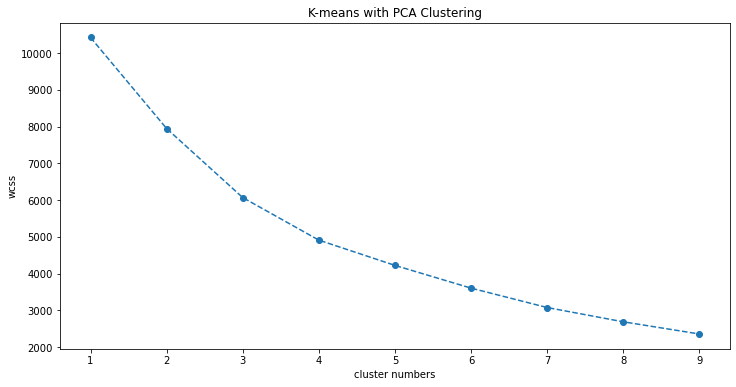

In [377]:
#plot the wcss to find out the number of components (the optimum clusters 4,5 elbow point when PCA=6)
plt.figure(figsize=(12,6))
plt.plot(range(1,10),wcss,marker='o',linestyle="--")
plt.xlabel('cluster numbers')
plt.ylabel('wcss')
plt.title('K-means with PCA Clustering')
plt.show()


In [378]:
# applying K_means clusters N_compnents=4
kmeans3_pca5=KMeans(n_clusters=3,init='k-means++', random_state=1)
kmeans3_pca5.fit(components5)

KMeans(n_clusters=3, random_state=1)

In [379]:
df.head()

,cust_id,credit_limit,credit_rating,ending_balance,credit_mode,credit_sum,credit_tran_count,check_balance,check_mode,check_sum,...,save_tran_count,account_active_N,account_active_N,account_active_Y,check_account_status_N,check_account_status_N,check_account_status_Y,saving_account_status_N,saving_account_status_N,saving_account_status_Y
0,1363160,1000.0,0.0,286.69,2.0,12506.95,68.0,0.00,0.0,0.00,...,48.0,0,0,1,1,0,0,0,0,1
1,1362487,3000.0,0.0,1548.23,2.0,4773.21,32.0,1401.21,1.0,3244.83,...,19.0,0,0,1,0,0,1,0,1,0
2,1362548,6700.0,0.0,68.68,2.0,15089.99,22.0,569.65,2.0,16817.43,...,12.0,0,0,1,0,0,1,0,0,1
3,1362752,2400.0,0.0,0.00,2.0,6182.65,15.0,3.76,1.0,12086.71,...,12.0,0,1,0,0,0,1,0,0,1
4,1363017,1000.0,0.0,1000.00,1.0,10172.72,63.0,147.15,2.0,10057.28,...,24.0,0,0,1,0,0,1,0,1,0


In [380]:
# combining the kmeans clustering with PCA results
df_pca_kmeans=pd.concat([df.reset_index(drop=True),pd.DataFrame(components7)],axis=1)
df_pca_kmeans.columns.values[-5:]=['PC1','PC2','PC3','PC4','PC5']
df_pca_kmeans['Cluster Lables']=kmeans3_pca5.labels_

In [381]:
df_pca_kmeans.head()

,cust_id,credit_limit,credit_rating,ending_balance,credit_mode,credit_sum,credit_tran_count,check_balance,check_mode,check_sum,...,saving_account_status_N,saving_account_status_Y,0,1,PC1,PC2,PC3,PC4,PC5,Cluster Lables
0,1363160,1000.0,0.0,286.69,2.0,12506.95,68.0,0.00,0.0,0.00,...,0,1,-1.297745,2.828749,2.977758,-0.499051,0.002581,-0.029952,0.130396,0
1,1362487,3000.0,0.0,1548.23,2.0,4773.21,32.0,1401.21,1.0,3244.83,...,1,0,1.001439,0.397707,0.262471,-0.959019,1.414235,3.414455,-0.911027,1
2,1362548,6700.0,0.0,68.68,2.0,15089.99,22.0,569.65,2.0,16817.43,...,0,1,2.463961,0.654291,-0.840895,-0.471201,-0.188548,-0.368825,0.468413,1
3,1362752,2400.0,0.0,0.00,2.0,6182.65,15.0,3.76,1.0,12086.71,...,0,1,0.407127,0.357055,-1.088803,1.666099,-0.537239,0.956121,2.825988,1
4,1363017,1000.0,0.0,1000.00,1.0,10172.72,63.0,147.15,2.0,10057.28,...,1,0,1.690153,0.720865,-1.201116,-0.817672,1.606687,3.370516,-0.836157,1


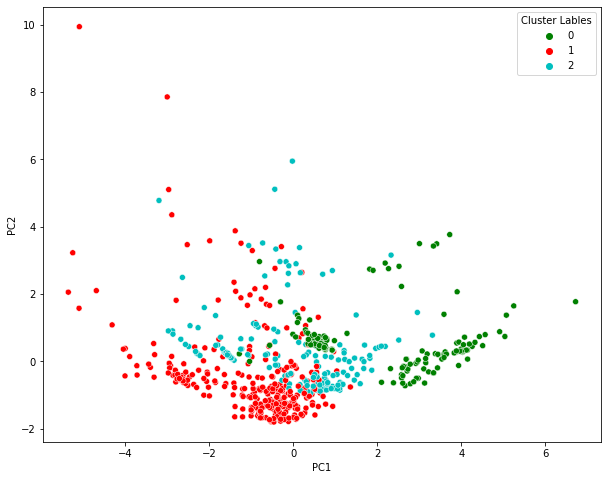

In [382]:
# plot the PCA components 
x_axis=df_pca_kmeans['PC1']
y_axis=df_pca_kmeans['PC2']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue= df_pca_kmeans['Cluster Lables'],palette=['g','r','c'])
plt.show()

In [383]:
df_pc=df_pca_kmeans[['PC1','PC2','PC3','PC4','PC5']]

In [384]:
df_pc.head()

,PC1,PC2,PC3,PC4,PC5
0,2.977758,-0.499051,0.002581,-0.029952,0.130396
1,0.262471,-0.959019,1.414235,3.414455,-0.911027
2,-0.840895,-0.471201,-0.188548,-0.368825,0.468413
3,-1.088803,1.666099,-0.537239,0.956121,2.825988
4,-1.201116,-0.817672,1.606687,3.370516,-0.836157


In [386]:
dp=df_pca_kmeans.groupby('Cluster Lables').agg({'PC1':['mean'],'PC2':['mean'],'PC3':['mean'],'PC4':['mean'],'PC5':['mean']}).reset_index()

In [387]:
dp.head(10)

,Cluster Lables,PC1,PC2,PC3,PC4,PC5
,,mean,mean,mean,mean,mean
0,0,2.172110,0.567787,-0.138824,0.014702,-0.291342
1,1,-0.930853,-0.457537,0.110499,0.113728,0.223459
2,2,-0.151446,0.286434,-0.067950,-0.183702,-0.129759


In [284]:
# d0=df_pc[df_pc['Cluster Lables']==0]
# d1=df_pc[df_pc['Cluster Lables']==1]
# d2=df_pc[df_pc['Cluster Lables']==2]
# d3=df_pc[df_pc['Cluster Lables']==3]

In [389]:
import plotly.graph_objects as go

categories = ['PC1','PC2','PC3','PC4','PC5']

fig = go.Figure()
fig.add_trace(go.Scatterpolar(
      r=[2.172110,	0.567787,	-0.138824,	0.014702,	-0.291342],
      theta=categories,
      fill='toself',
      name='cluster1'
))
fig.add_trace(go.Scatterpolar(
      r=[-0.930853,	-0.457537,	0.110499,	0.113728,	0.223459],
      theta=categories,
      fill='toself',
      name='cluster2'
))
fig.add_trace(go.Scatterpolar(
      r=[-0.151446,	0.286434,	-0.067950,	-0.183702,	-0.129759],
      theta=categories,
      fill='toself',
      name='cluster3'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-0.5, 0.5]
    )),
  showlegend=True
)

fig.show()

# Kmeans without PCA: combining the demographic data with the main account info


In [2]:
import pandas as pd 
import numpy as np 


In [49]:
data=pd.read_csv('twm_transactions.csv',sep=';')

In [46]:
acc=pd.read_csv('twm_accounts.csv',sep=';')
acc.head()

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28


In [27]:
a=acc[['cust_id','acct_type','ending_balance']]
a.head()

,cust_id,acct_type,ending_balance
0,1362806,SV,284.58
1,1362709,CC,496.15
2,1362836,CC,1000.00
3,1363311,CK,968.46
4,1363361,CC,462.28


In [28]:
a=a.pivot_table(index=['cust_id'],columns='acct_type', values='ending_balance')

In [29]:
a

acct_type,CC,CK,SV
cust_id,,,
1362480,20.00,86.86,1187.97
1362484,369.72,95.32,2122.17
1362485,1100.00,45.49,NaN
1362486,NaN,3312.27,116.24
1362487,1548.23,1401.21,12.89
...,...,...,...
1363490,NaN,NaN,2301.53
1363491,NaN,NaN,17.82
1363492,6869.00,106.14,1116.10


In [30]:
a.fillna(0, inplace=True)

In [31]:
a

acct_type,CC,CK,SV
cust_id,,,
1362480,20.00,86.86,1187.97
1362484,369.72,95.32,2122.17
1362485,1100.00,45.49,0.00
1362486,0.00,3312.27,116.24
1362487,1548.23,1401.21,12.89
...,...,...,...
1363490,0.00,0.00,2301.53
1363491,0.00,0.00,17.82
1363492,6869.00,106.14,1116.10


In [32]:
a.columns

Index(['CC  ', 'CK  ', 'SV  '], dtype='object', name='acct_type')

In [33]:
a=a.rename(columns={'CC  ':'CC', 'CK  ':'CK', 'SV  ':'SV'})

In [34]:
a['net_worth']=a['CC']+a['SV']-a['CC']

In [41]:
a.reset_index('cust_id',inplace=True)

In [43]:
Net=a[['cust_id','net_worth']]
Net

acct_type,cust_id,net_worth
0,1362480,1187.97
1,1362484,2122.17
2,1362485,0.00
3,1362486,116.24
4,1362487,12.89
...,...,...
660,1363490,2301.53
661,1363491,17.82
662,1363492,1116.10
663,1363493,553.61


In [96]:
data.head()

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,27,13625623,0.00,0.00,0.0,3753.34,21.10.1995,121656,A,IQ
1,97,13628392,0.00,0.00,0.0,254.49,5.2.1995,153053,V,IQ
2,21,13630842,-97.57,-97.57,0.0,3819.56,23.7.1995,0,P,WD
3,44,13631412,-0.15,-0.15,0.0,224.05,30.1.1995,0,,FK
4,31,13625722,0.00,0.00,0.0,240.55,25.1.1995,204521,B,IQ


In [97]:
data=data.groupby('acct_nbr').count().reset_index()

In [99]:
d1=data[['acct_nbr','tran_id']]

In [100]:
f=acc.merge(d1, on='acct_nbr', how='outer')

In [101]:
f.head()

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,tran_id
0,13628063,1362806.0,SV,Y,10.12.1995,NaN,1430.22,284.58,40.0
1,4561143213627090,1362709.0,CC,Y,15.3.1993,NaN,266.34,496.15,55.0
2,4561143213628360,1362836.0,CC,Y,18.3.1992,NaN,55.90,1000.00,41.0
3,13633112,1363311.0,CK,Y,6.7.1995,NaN,11017.13,968.46,99.0
4,4561143213633610,1363361.0,CC,Y,17.6.1994,NaN,849.37,462.28,43.0


In [102]:
f=f[['cust_id','acct_type','tran_id']]

In [103]:
f=f.pivot_table(index=['cust_id'],columns='acct_type', values='tran_id')

In [104]:
f.head()

acct_type,CC,CK,SV
cust_id,,,
1362480.0,32.0,99.0,26.0
1362484.0,55.0,99.0,33.0
1362485.0,72.0,99.0,NaN
1362486.0,NaN,25.0,25.0
1362487.0,32.0,52.0,19.0


In [107]:
f.fillna(0, inplace=True)

In [108]:
f=f.rename(columns={'CC  ':'CC', 'CK  ':'CK', 'SV  ':'SV'})

In [109]:
f['total_tran_number']=f['CC']+f['CK']+f['SV']
f

acct_type,CC,CK,SV,total_tran_number
cust_id,,,,
1362480.0,32.0,99.0,26.0,157.0
1362484.0,55.0,99.0,33.0,187.0
1362485.0,72.0,99.0,0.0,171.0
1362486.0,0.0,25.0,25.0,50.0
1362487.0,32.0,52.0,19.0,103.0
...,...,...,...,...
1363490.0,0.0,0.0,12.0,12.0
1363491.0,0.0,0.0,18.0,18.0
1363492.0,29.0,99.0,25.0,153.0


In [113]:
f.index

Float64Index([1362480.0, 1362484.0, 1362485.0, 1362486.0, 1362487.0, 1362488.0,
              1362489.0, 1362492.0, 1362496.0, 1362497.0,
              ...
              1363482.0, 1363483.0, 1363484.0, 1363485.0, 1363486.0, 1363490.0,
              1363491.0, 1363492.0, 1363493.0, 1363495.0],
             dtype='float64', name='cust_id', length=664)

In [115]:
fa=a.merge(f, on='cust_id', how='left')

In [117]:
fa=fa[['cust_id','net_worth','total_tran_number']]

In [120]:
cust=pd.read_csv('twm_customer.csv')
cust.head(1)

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV


In [121]:
cusf=cust.merge(fa,on='cust_id',how='left')

In [122]:
cusf.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code,net_worth,total_tran_number
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV,NaN,NaN
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA,12.89,103.0
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA,122.54,116.0
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA,609.33,120.0
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY,254.02,133.0


In [126]:
CUS=cusf[['cust_id','income','age','years_with_bank','nbr_children','marital_status','net_worth','total_tran_number']]
CUS.fillna(0,inplace=True)

In [129]:
import matplotlib.pyplot as plt  
import seaborn as sns 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [130]:
CUS.columns

Index(['cust_id', 'income', 'age', 'years_with_bank', 'nbr_children',
       'marital_status', 'net_worth', 'total_tran_number'],
      dtype='object')

In [135]:
CUS.head()

,cust_id,income,age,years_with_bank,nbr_children,marital_status,net_worth,total_tran_number
0,1362691,26150,46,5,1,2,0.00,0.0
1,1362487,6605,71,1,0,2,12.89,103.0
2,1363160,18548,38,8,0,1,122.54,116.0
3,1362752,47668,54,3,0,1,609.33,120.0
4,1362548,44554,59,9,2,4,254.02,133.0


In [132]:
cat=CUS.dtypes[CUS.dtypes=='object'].index.to_list()
num=CUS.dtypes[CUS.dtypes!='object'].index.to_list()

In [142]:
C=CUS.drop('cust_id',axis=1)
scaler=StandardScaler()
C=scaler.fit_transform(C)
C

array([[ 0.1541846 ,  0.18431237,  0.40853922, ...,  0.13214882,
        -0.42655787, -1.60355995],
       [-0.72652421,  1.49307037, -1.08743527, ...,  0.13214882,
        -0.41880312, -0.01279788],
       [-0.18836584, -0.23449019,  1.53052009, ..., -0.98961444,
        -0.35283662,  0.18797791],
       ...,
       [ 1.73806357,  0.39371365, -1.4614289 , ...,  0.13214882,
        -0.42655787,  0.35786513],
       [-0.34373468, -0.28684051,  1.15652647, ...,  0.13214882,
        -0.42655787,  1.08374684],
       [-0.21869161, -1.28149658, -0.33944803, ..., -0.98961444,
        -0.42655787,  0.86752676]])

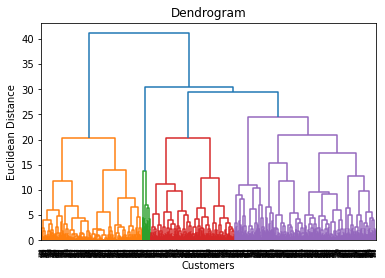

In [145]:
den=sch.dendrogram(sch.linkage(C,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

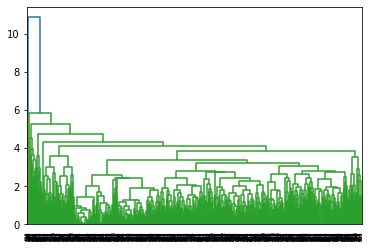

In [189]:
plt.Figure(figsize=(12,10))
den1=sch.dendrogram(sch.linkage(C,method='average'))

#plt.title('Dendrogram-average')
#plt.xlabel('Customers')
#plt.ylabel('Euclidean Distance')
plt.show()

In [146]:
# based on the Dendrogram, select cluster=4 
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(C)

In [148]:
#print(y_hc)

In [152]:
CUS['cluster no']=y_hc

In [155]:
CUS.head()
CUS.columns

Index(['cust_id', 'income', 'age', 'years_with_bank', 'nbr_children',
       'marital_status', 'net_worth', 'total_tran_number', 'cluster no'],
      dtype='object')

In [154]:
# plt.figure(figsize=(12,10))
# plt.scatter(C[y_hc==0,0], C[y_hc==0,1], s=100, c='red',label='Cluster 1')
# plt.scatter(C[y_hc==1,0], C[y_hc==1,1], s=100, c='blue',label='Cluster 2')
# plt.scatter(C[y_hc==2,0], C[y_hc==2,1], s=100, c='green',label='Cluster 3')
# plt.scatter(C[y_hc==3,0], C[y_hc==3,1], s=100, c='purple',label='Cluster 4')
# plt.title('Customer Segmentation Clusters')
# plt.show()

In [162]:
dC=pd.DataFrame(C,columns=['income', 'age', 'years_with_bank', 'nbr_children',
       'marital_status', 'net_worth', 'total_tran_number'])
id=CUS['cust_id']
dC=pd.concat([dC,id],axis=1)

In [164]:
dC['cluster']=y_hc

,income,age,years_with_bank,nbr_children,marital_status,net_worth,total_tran_number,cust_id,cluster
0,0.154185,0.184312,0.408539,0.258591,0.132149,-0.426558,-1.603560,1362691,3
1,-0.726524,1.493070,-1.087435,-0.648298,0.132149,-0.418803,-0.012798,1362487,3
2,-0.188366,-0.234490,1.530520,-0.648298,-0.989614,-0.352837,0.187978,1363160,3
3,1.123798,0.603115,-0.339448,-0.648298,-0.989614,-0.059979,0.249755,1362752,1
4,0.983479,0.864867,1.904514,1.165479,2.375675,-0.273737,0.450531,1362548,0
...,...,...,...,...,...,...,...,...,...
742,-0.357478,-0.339191,0.782533,0.258591,2.375675,-0.426558,-0.924011,1363324,0
743,0.164864,0.707816,0.782533,0.258591,0.132149,-0.368653,-0.754124,1362895,0
744,1.738064,0.393714,-1.461429,1.165479,0.132149,-0.426558,0.357865,1362569,0
745,-0.343735,-0.286841,1.156526,-0.648298,0.132149,-0.426558,1.083747,1363364,0


In [179]:
dC.corr()

,income,age,years_with_bank,nbr_children,marital_status,net_worth,total_tran_number,cust_id,cluster
income,1.000000,0.244919,0.040604,0.283352,0.247422,0.210678,0.097102,-0.015280,-0.207249
age,0.244919,1.000000,0.181478,-0.057195,0.340570,0.028645,0.145054,-0.047987,0.357468
years_with_bank,0.040604,0.181478,1.000000,-0.034814,-0.010743,0.039620,-0.015324,-0.004047,0.072711
nbr_children,0.283352,-0.057195,-0.034814,1.000000,0.476528,0.021223,0.011653,-0.008359,-0.497074
marital_status,0.247422,0.340570,-0.010743,0.476528,1.000000,0.034805,0.121875,0.012171,-0.300557
net_worth,0.210678,0.028645,0.039620,0.021223,0.034805,1.000000,0.177259,-0.029175,0.068111
total_tran_number,0.097102,0.145054,-0.015324,0.011653,0.121875,0.177259,1.000000,0.015269,-0.107352
cust_id,-0.015280,-0.047987,-0.004047,-0.008359,0.012171,-0.029175,0.015269,1.000000,-0.047826
cluster,-0.207249,0.357468,0.072711,-0.497074,-0.300557,0.068111,-0.107352,-0.047826,1.000000


In [182]:
# plt.figure(figsize=(12,10)) -no strong correlations
# sns.heatmap(dC.corr())

In [166]:
mean=dC.groupby('cluster').agg({'income':['mean'], 'age':['mean'], 'years_with_bank':['mean'], 'nbr_children':['mean'],'marital_status':['mean'], 'net_worth':['mean'],'total_tran_number':['mean']}).reset_index()

In [168]:
mean

,cluster,income,age,years_with_bank,nbr_children,marital_status,net_worth,total_tran_number
,,mean,mean,mean,mean,mean,mean,mean
0,0,0.442295,0.106454,0.088143,0.769799,0.728755,-0.130455,0.152466
1,1,-0.556159,-0.942719,-0.331210,-0.632318,-0.930314,-0.052414,-0.122881
2,2,1.285359,0.406031,0.122544,0.471976,0.330107,5.032833,0.500498
3,3,-0.182453,0.918879,0.240341,-0.561928,-0.123067,-0.173002,-0.150734


In [174]:
import plotly.graph_objects as go

categories = ['income','age','years_with_bank','nbr_children','marital_status','net_worth','total_tran_number']

fig = go.Figure()
fig.add_trace(go.Scatterpolar(
      r=[0.442295,	0.106454,	0.088143,	0.769799,	0.728755,	-0.130455,	0.152466],
      theta=categories,
      fill='toself',
      name='cluster1'
))
fig.add_trace(go.Scatterpolar(
      r=[-0.556159,	-0.942719,	-0.331210,	-0.632318,	-0.930314,	-0.052414,	-0.1228819],
      theta=categories,
      fill='toself',
      name='cluster2'
))
fig.add_trace(go.Scatterpolar(
      r=[1.285359,	0.406031,	0.122544,	0.471976,	0.330107,	5.032833,	0.500498],
      theta=categories,
      fill='toself',
      name='cluster3'
))

fig.add_trace(go.Scatterpolar(
       r=[-0.182453,	0.918879,	0.240341,	-0.561928,	-0.123067,	-0.173002,	-0.150734],
       theta=categories,
       fill='toself',
       name='cluster4'
 ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-0.5, 1]
    )),
  showlegend=True
)

fig.show()

In [190]:
CUS

,cust_id,income,age,years_with_bank,nbr_children,marital_status,net_worth,total_tran_number,cluster no
0,1362691,26150,46,5,1,2,0.00,0.0,3
1,1362487,6605,71,1,0,2,12.89,103.0,3
2,1363160,18548,38,8,0,1,122.54,116.0,3
3,1362752,47668,54,3,0,1,609.33,120.0,1
4,1362548,44554,59,9,2,4,254.02,133.0,0
...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,4,0.00,44.0,0
743,1362895,26387,56,6,1,2,96.25,55.0,0
744,1362569,61300,50,0,2,2,0.00,127.0,0
745,1363364,15100,37,7,0,2,0.00,174.0,0


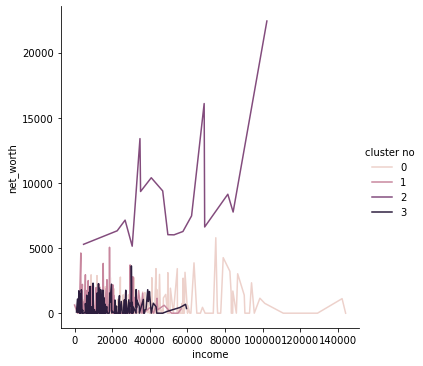

In [200]:
#income ,net worth on clusters
sns.relplot(data=CUS,x='income', y='net_worth',kind='line', hue='cluster no', )

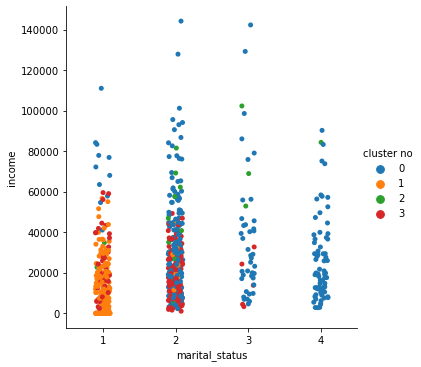

In [202]:
sns.catplot(data=CUS,x='marital_status', y='income', hue='cluster no' )

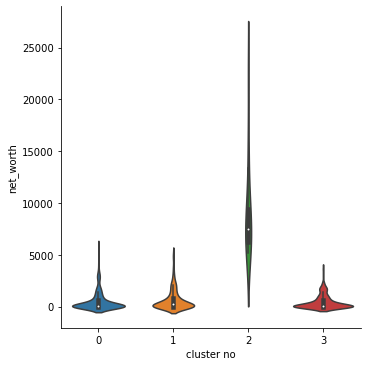

In [212]:
sns.catplot(x='cluster no',y='net_worth',kind='violin', data=CUS)

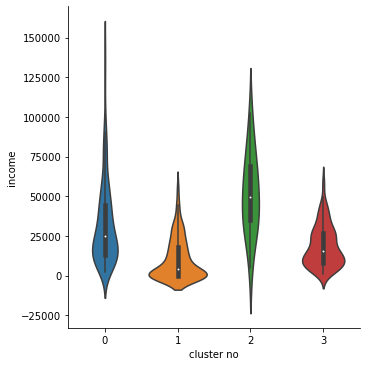

In [213]:
sns.catplot(x='cluster no',y='income',kind='violin', data=CUS)

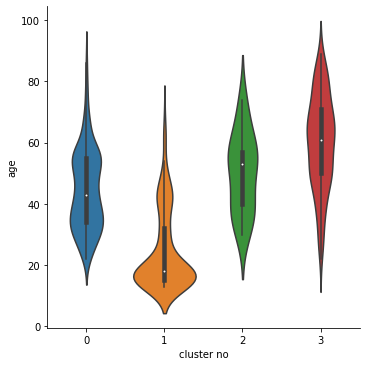

In [214]:
sns.catplot(x='cluster no',y='age',kind='violin', data=CUS)


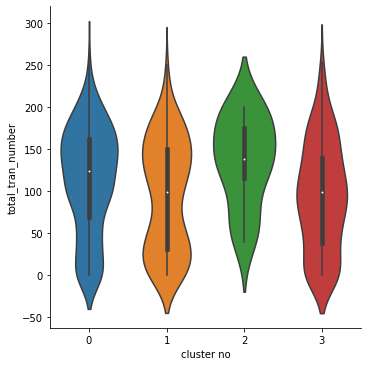

In [215]:
sns.catplot(x='cluster no',y='total_tran_number',kind='violin', data=CUS)

In [207]:
CUS.head(1)

,cust_id,income,age,years_with_bank,nbr_children,marital_status,net_worth,total_tran_number,cluster no
0,1362691,26150,46,5,1,2,0.0,0.0,3


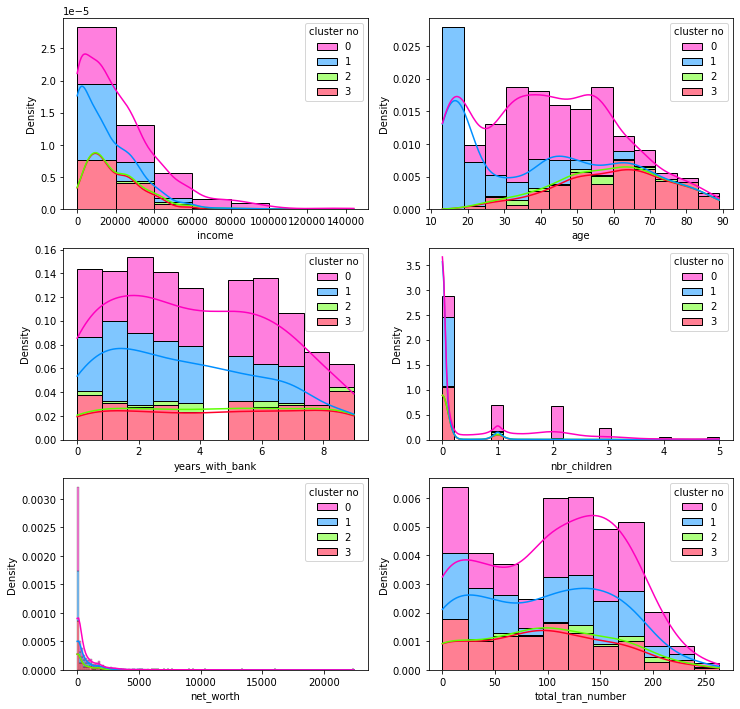

In [209]:
plt.figure(figsize=(12, 12))
plt.subplot(3, 2, 1)
sns.histplot(data=CUS, x="income", hue="cluster no", multiple="stack", palette="gist_rainbow_r", kde=True, stat="density", bins=np.arange(0, 160000, 20000))
plt.subplot(3, 2, 2)
sns.histplot(data=CUS, x="age", hue="cluster no", multiple="stack", palette="gist_rainbow_r", kde=True, stat="density")
plt.subplot(3, 2, 3)
sns.histplot(data=CUS, x="years_with_bank", hue="cluster no", multiple="stack", palette="gist_rainbow_r", kde=True, stat="density")
plt.subplot(3, 2, 4)
sns.histplot(data=CUS, x="nbr_children", hue="cluster no", multiple="stack", palette="gist_rainbow_r", kde=True, stat="density")
plt.subplot(3, 2, 5)
sns.histplot(data=CUS, x="net_worth", hue="cluster no", multiple="stack", palette="gist_rainbow_r", kde=True, stat="density")
plt.subplot(3, 2, 6)
sns.histplot(data=CUS, x="total_tran_number", hue="cluster no", multiple="stack", palette="gist_rainbow_r", kde=True, stat="density")